In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from scipy.signal import savgol_filter
from bokeh.io import output_notebook, show
import matplotlib.pyplot as plt

output_notebook()

# set global plotting backend for pandas
pd.options.plotting.backend = "ms_matplotlib" # one of: "ms_bokeh" "ms_matplotlib" "ms_plotly"
pd.set_option('display.width',500)

# Save matplotlib dir
save_dir = "/home/singjc/Documents/roest_lab/publications/pyopenms_viz/"

if pd.options.plotting.backend in ["ms_matplotlib", "ms_bokeh"]:
    title_font_size = 20
    xaxis_label_font_size = 30
    yaxis_label_font_size = 30
    xaxis_tick_font_size = 28
    yaxis_tick_font_size = 28
    annotation_font_size = 20
else:
    title_font_size = 28
    xaxis_label_font_size = 26
    yaxis_label_font_size = 26
    xaxis_tick_font_size = 24
    yaxis_tick_font_size = 24
    annotation_font_size = 24

Loading BokehJS ...

In [2]:
# # Download test file
# import requests

# url = 'https://raw.githubusercontent.com/Roestlab/massdash/dev/test/test_data/featureMap/ionMobilityTestFeatureDf.tsv'
# file_name = 'ionMobilityTestFeatureDf.tsv'

# # Send a GET request to the URL
# response = requests.get(url)

# # Save the content of the response to a file
# with open(file_name, 'wb') as file:
#     file.write(response.content)

# print(f'File {file_name} downloaded successfully!')

# # Code to add annotation to ionMobilityTestFeatureDf data

# import pyopenms as oms

# df_ms_experiment = pd.read_csv("./ionMobilityTestFeatureDf.tsv", sep="\t")
# print(df_ms_experiment.head())

# peptide = "AFVDFLSDEIK"
# charge = 2

# seq = oms.AASequence.fromString(peptide)

# ion_annotations = ['prec', 'y4^1', 'y5^1', 'y6^1', 'y7^1', 'y8^1', 'y9^1']
# ion_ordinals = [4, 5, 6, 7, 8, 9]

# print("=" * 35)
# # print("precursor mz:", round(seq.getMZ(charge), 4))

# ion_formula = [peptide]
# ion_mz = [round(seq.getMZ(charge), 4)]
# for ion in ion_ordinals:
#     suffix = seq.getSuffix(ion) 
#     # print(f"y{ion} ion sequence: {suffix}")
#     y3_formula = suffix.getFormula(oms.Residue.ResidueType.YIon, 1)  # y3++ ion
#     # print(f"y{ion} mz: {round(suffix.getMZ(1), 4)}")
#     ion_formula.append(suffix)
#     ion_mz.append(round(suffix.getMZ(1), 4))
# annotation_df = pd.DataFrame({'Annotation':ion_annotations, 'product_mz':ion_mz, 'sequence':ion_formula})
# print(annotation_df)

# df = pd.merge(df_ms_experiment[['ms_level', 'mz', 'rt', 'im', 'int', 'precursor_mz', 'product_mz', 'Annotation']], annotation_df, on=['Annotation', 'product_mz'])
# # df['sequence'] = peptide
# # df['precursor_charge'] = charge
# df.rename(columns={'Annotation':'ion_annotation'}, inplace=True)
# df.to_csv("test_data.tsv", sep="\t", index=False)
# df

In [3]:
df = pd.read_csv("test_data.tsv", sep="\t")
print(df.head())

   ms_level          mz           rt        im         int  precursor_mz  product_mz ion_annotation     sequence
0         1  642.334187  6225.005106  0.900254   76.000460      642.3295    642.3295           prec  AFVDFLSDEIK
1         1  642.334187  6225.005106  0.969271  153.011280      642.3295    642.3295           prec  AFVDFLSDEIK
2         2  504.262011  6225.110817  0.935281   68.001520      642.3295    504.2664           y4^1         DEIK
3         2  504.262011  6225.110817  1.025902   41.000328      642.3295    504.2664           y4^1         DEIK
4         2  504.262011  6225.110817  0.926001   43.000782      642.3295    504.2664           y4^1         DEIK


/home/singjc/Documents/github/pyopenms_viz/pyopenms_viz/_core.py:250: UserWarning: Duplicate data detected, data will not be aggregated which may lead to unexpected plots. To enable aggregation set `aggregate_duplicates=True`.
  warnings.warn(


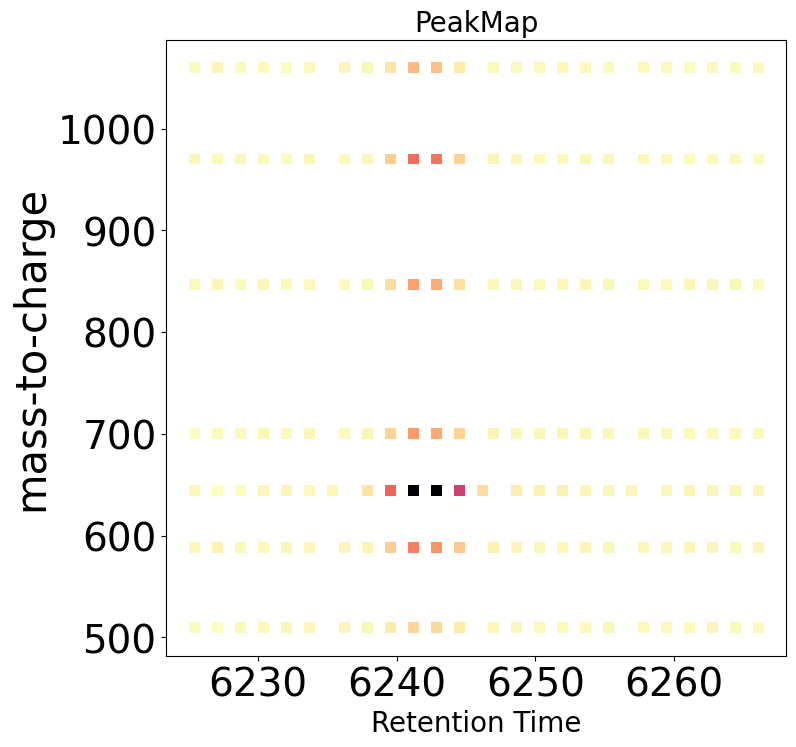

In [4]:
p = df.plot(kind="peakmap", 
        x="rt", y="mz", z="int", 
        # ylabel="Ion Mobility",
        width=800, height=800,
        grid=False, 
        title_font_size=title_font_size,  
        xaxis_label_font_size=title_font_size,  
        yaxis_label_font_size=yaxis_label_font_size,  
        xaxis_tick_font_size=xaxis_tick_font_size, 
        yaxis_tick_font_size=yaxis_tick_font_size,
        marker_size=60,
        show_plot=False
       )
# if pd.options.plotting.backend == "ms_matplotlib":
#     plt.savefig(f"{save_dir}/peakmap_mz_rt_matplotlib.png", bbox_inches='tight')
#     plt.savefig(f"{save_dir}/figure_3_d_peakmap_mz_rt_matplotlib.pdf", bbox_inches='tight')


/home/singjc/Documents/github/pyopenms_viz/pyopenms_viz/_core.py:250: UserWarning: Duplicate data detected, data will not be aggregated which may lead to unexpected plots. To enable aggregation set `aggregate_duplicates=True`.
  warnings.warn(


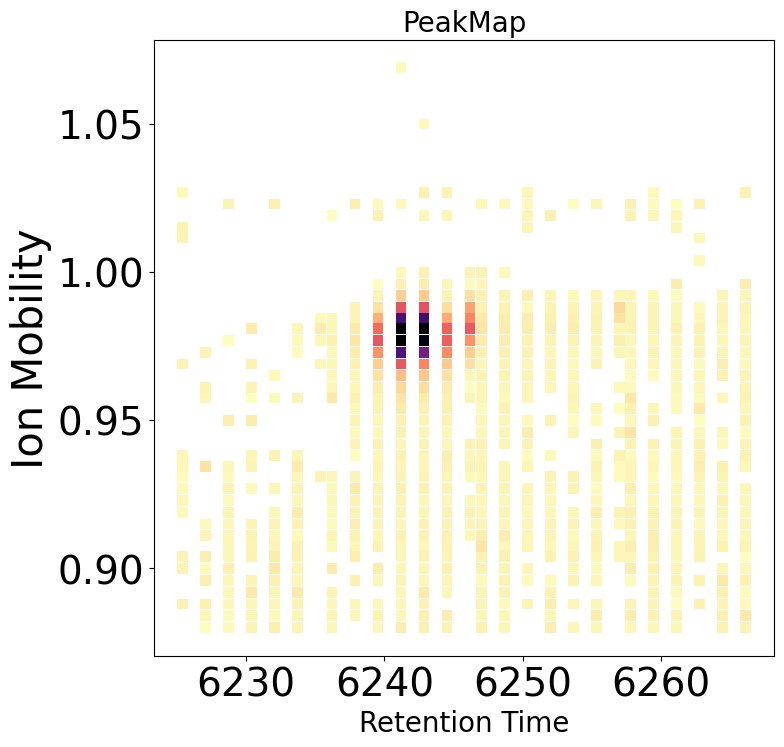

In [5]:
p = df.plot(kind="peakmap", 
        x="rt", y="im", z="int", 
        ylabel="Ion Mobility",
        width=800, height=800,
        grid=False, 
        title_font_size=title_font_size,  
        xaxis_label_font_size=title_font_size,  
        yaxis_label_font_size=yaxis_label_font_size,  
        xaxis_tick_font_size=xaxis_tick_font_size, 
        yaxis_tick_font_size=yaxis_tick_font_size,
        marker_size=60,
        show_plot=False
       )
# if pd.options.plotting.backend == "ms_matplotlib":
#     plt.savefig(f"{save_dir}/peakmap_im_rt_matplotlib.png", bbox_inches='tight')
#     plt.savefig(f"{save_dir}/figure_3_e_peakmap_im_rt_matplotlib.pdf", bbox_inches='tight')


/home/singjc/Documents/github/pyopenms_viz/pyopenms_viz/_core.py:250: UserWarning: Duplicate data detected, data will not be aggregated which may lead to unexpected plots. To enable aggregation set `aggregate_duplicates=True`.
  warnings.warn(


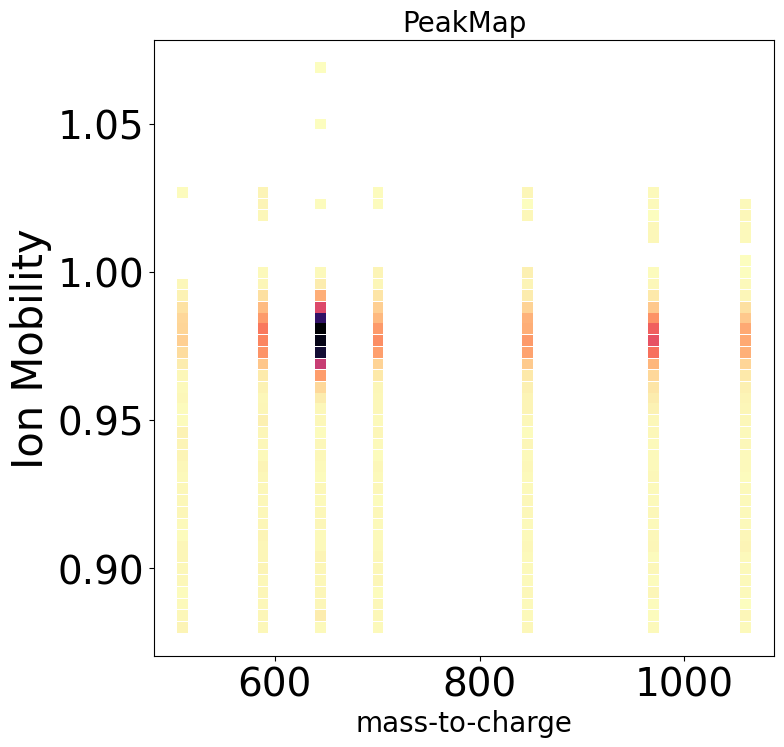

In [6]:
p = df.plot(kind="peakmap", 
        x="mz", y="im", z="int", 
        ylabel="Ion Mobility",
        xlabel="mass-to-charge",
        width=800, height=800,
        grid=False, 
        title_font_size=title_font_size,  
        xaxis_label_font_size=title_font_size,  
        yaxis_label_font_size=yaxis_label_font_size,  
        xaxis_tick_font_size=xaxis_tick_font_size, 
        yaxis_tick_font_size=yaxis_tick_font_size,
        marker_size=60,
        show_plot=False
       )
# if pd.options.plotting.backend == "ms_matplotlib":
#     plt.savefig(f"{save_dir}/peakmap_im_mz_matplotlib.png", bbox_inches='tight')
#     plt.savefig(f"{save_dir}/figure_3_f_peakmap_im_mz_matplotlib.pdf", bbox_inches='tight')


/home/singjc/Documents/github/pyopenms_viz/pyopenms_viz/_core.py:250: UserWarning: Duplicate data detected, data will not be aggregated which may lead to unexpected plots. To enable aggregation set `aggregate_duplicates=True`.
  warnings.warn(


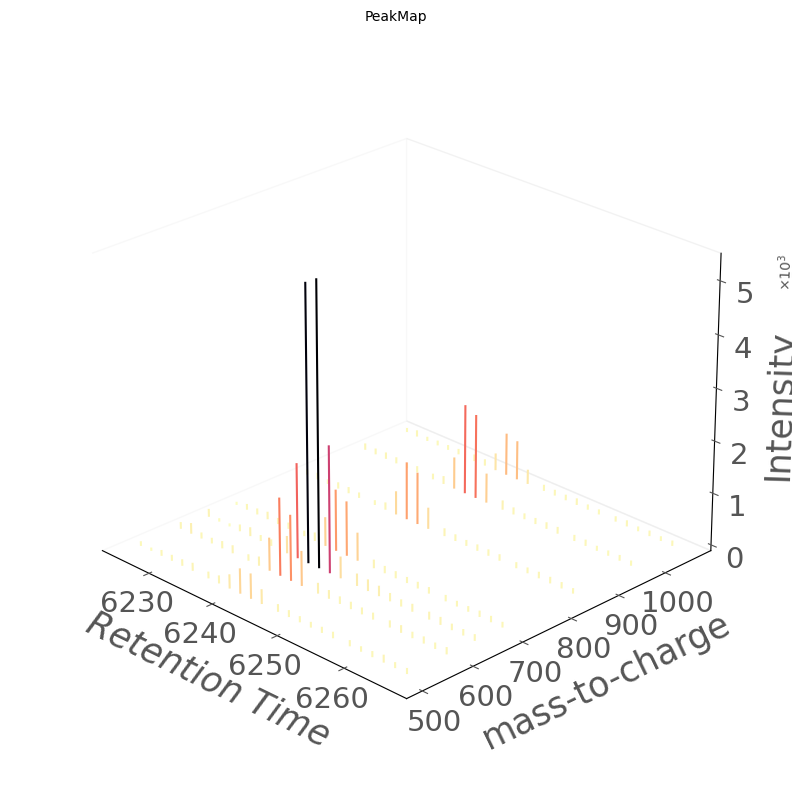

In [7]:
p = df.plot(kind="peakmap",
        x="rt", y="mz", z="int", 
        # ylabel="Ion Mobility",
        width=800, height=800,
        plot_3d=True,
        grid=False,
       title_font_size = title_font_size-10,
        xaxis_label_font_size = xaxis_label_font_size-5,
        yaxis_label_font_size = yaxis_label_font_size-5,
        xaxis_tick_font_size = xaxis_tick_font_size-7,
        yaxis_tick_font_size = yaxis_tick_font_size-7,
       show_plot=False)
# if pd.options.plotting.backend == "ms_plotly":
#     p.fig\
#     .update_layout(font_size=16) 
# if pd.options.plotting.backend == "ms_matplotlib":
#     plt.savefig(f"{save_dir}/peakmap_3d_mz_rt_matplotlib.png", bbox_inches='tight')
#     plt.savefig(f"{save_dir}/figure_3_j_peakmap_3d_mz_rt_matplotlib.pdf", bbox_inches='tight')

/home/singjc/Documents/github/pyopenms_viz/pyopenms_viz/_core.py:250: UserWarning: Duplicate data detected, data will not be aggregated which may lead to unexpected plots. To enable aggregation set `aggregate_duplicates=True`.
  warnings.warn(


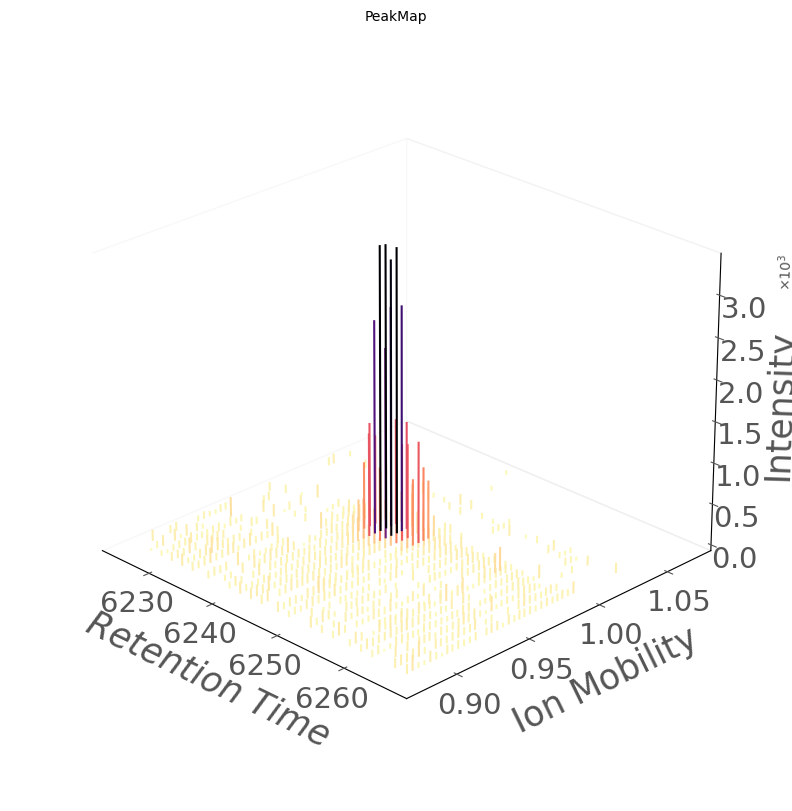

In [8]:
p = df.plot(kind="peakmap",
        x="rt", y="im", z="int", 
        ylabel="Ion Mobility",
        width=800, height=800,
        plot_3d=True,
        grid=False,
       title_font_size = title_font_size-10,
        xaxis_label_font_size = xaxis_label_font_size-5,
        yaxis_label_font_size = yaxis_label_font_size-5,
        xaxis_tick_font_size = xaxis_tick_font_size-7,
        yaxis_tick_font_size = yaxis_tick_font_size-7,
       show_plot=False)
# if pd.options.plotting.backend == "ms_plotly":
#     p.fig\
#     .update_layout(font_size=16) 
# if pd.options.plotting.backend == "ms_matplotlib":
#     plt.savefig(f"{save_dir}/peakmap_3d_im_rt_matplotlib.png", bbox_inches='tight')
#     plt.savefig(f"{save_dir}/figure_3_k_peakmap_3d_im_rt_matplotlib.pdf", bbox_inches='tight')

/home/singjc/Documents/github/pyopenms_viz/pyopenms_viz/_core.py:250: UserWarning: Duplicate data detected, data will not be aggregated which may lead to unexpected plots. To enable aggregation set `aggregate_duplicates=True`.
  warnings.warn(


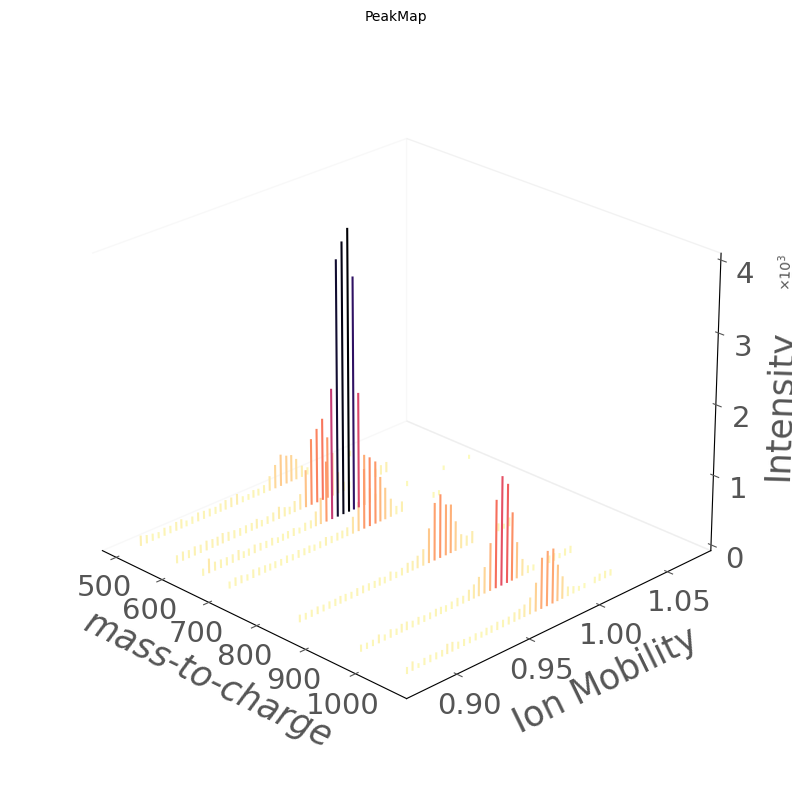

In [9]:
p = df.plot(kind="peakmap",
        x="mz", y="im", z="int", 
        xlabel="mass-to-charge",
        ylabel="Ion Mobility",
        width=800, height=800,
        plot_3d=True,
        grid=False,
       title_font_size = title_font_size-10,
        xaxis_label_font_size = xaxis_label_font_size-5,
        yaxis_label_font_size = yaxis_label_font_size-5,
        xaxis_tick_font_size = xaxis_tick_font_size-7,
        yaxis_tick_font_size = yaxis_tick_font_size-7,
       show_plot=False)
# if pd.options.plotting.backend == "ms_plotly":
#     p.fig\
#     .update_layout(font_size=16) 
# if pd.options.plotting.backend == "ms_matplotlib":
#     plt.savefig(f"{save_dir}/peakmap_3d_im_mz_matplotlib.png", bbox_inches='tight')
#     plt.savefig(f"{save_dir}/figure_3_l_peakmap_3d_im_mz_matplotlib.pdf", bbox_inches='tight')

/home/singjc/Documents/github/pyopenms_viz/pyopenms_viz/_core.py:250: UserWarning: Duplicate data detected, data will not be aggregated which may lead to unexpected plots. To enable aggregation set `aggregate_duplicates=True`.
  warnings.warn(
/home/singjc/Documents/github/pyopenms_viz/pyopenms_viz/_matplotlib/core.py:476: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter = ax.scatter(
/home/singjc/Documents/github/pyopenms_viz/pyopenms_viz/_matplotlib/core.py:476: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter = ax.scatter(


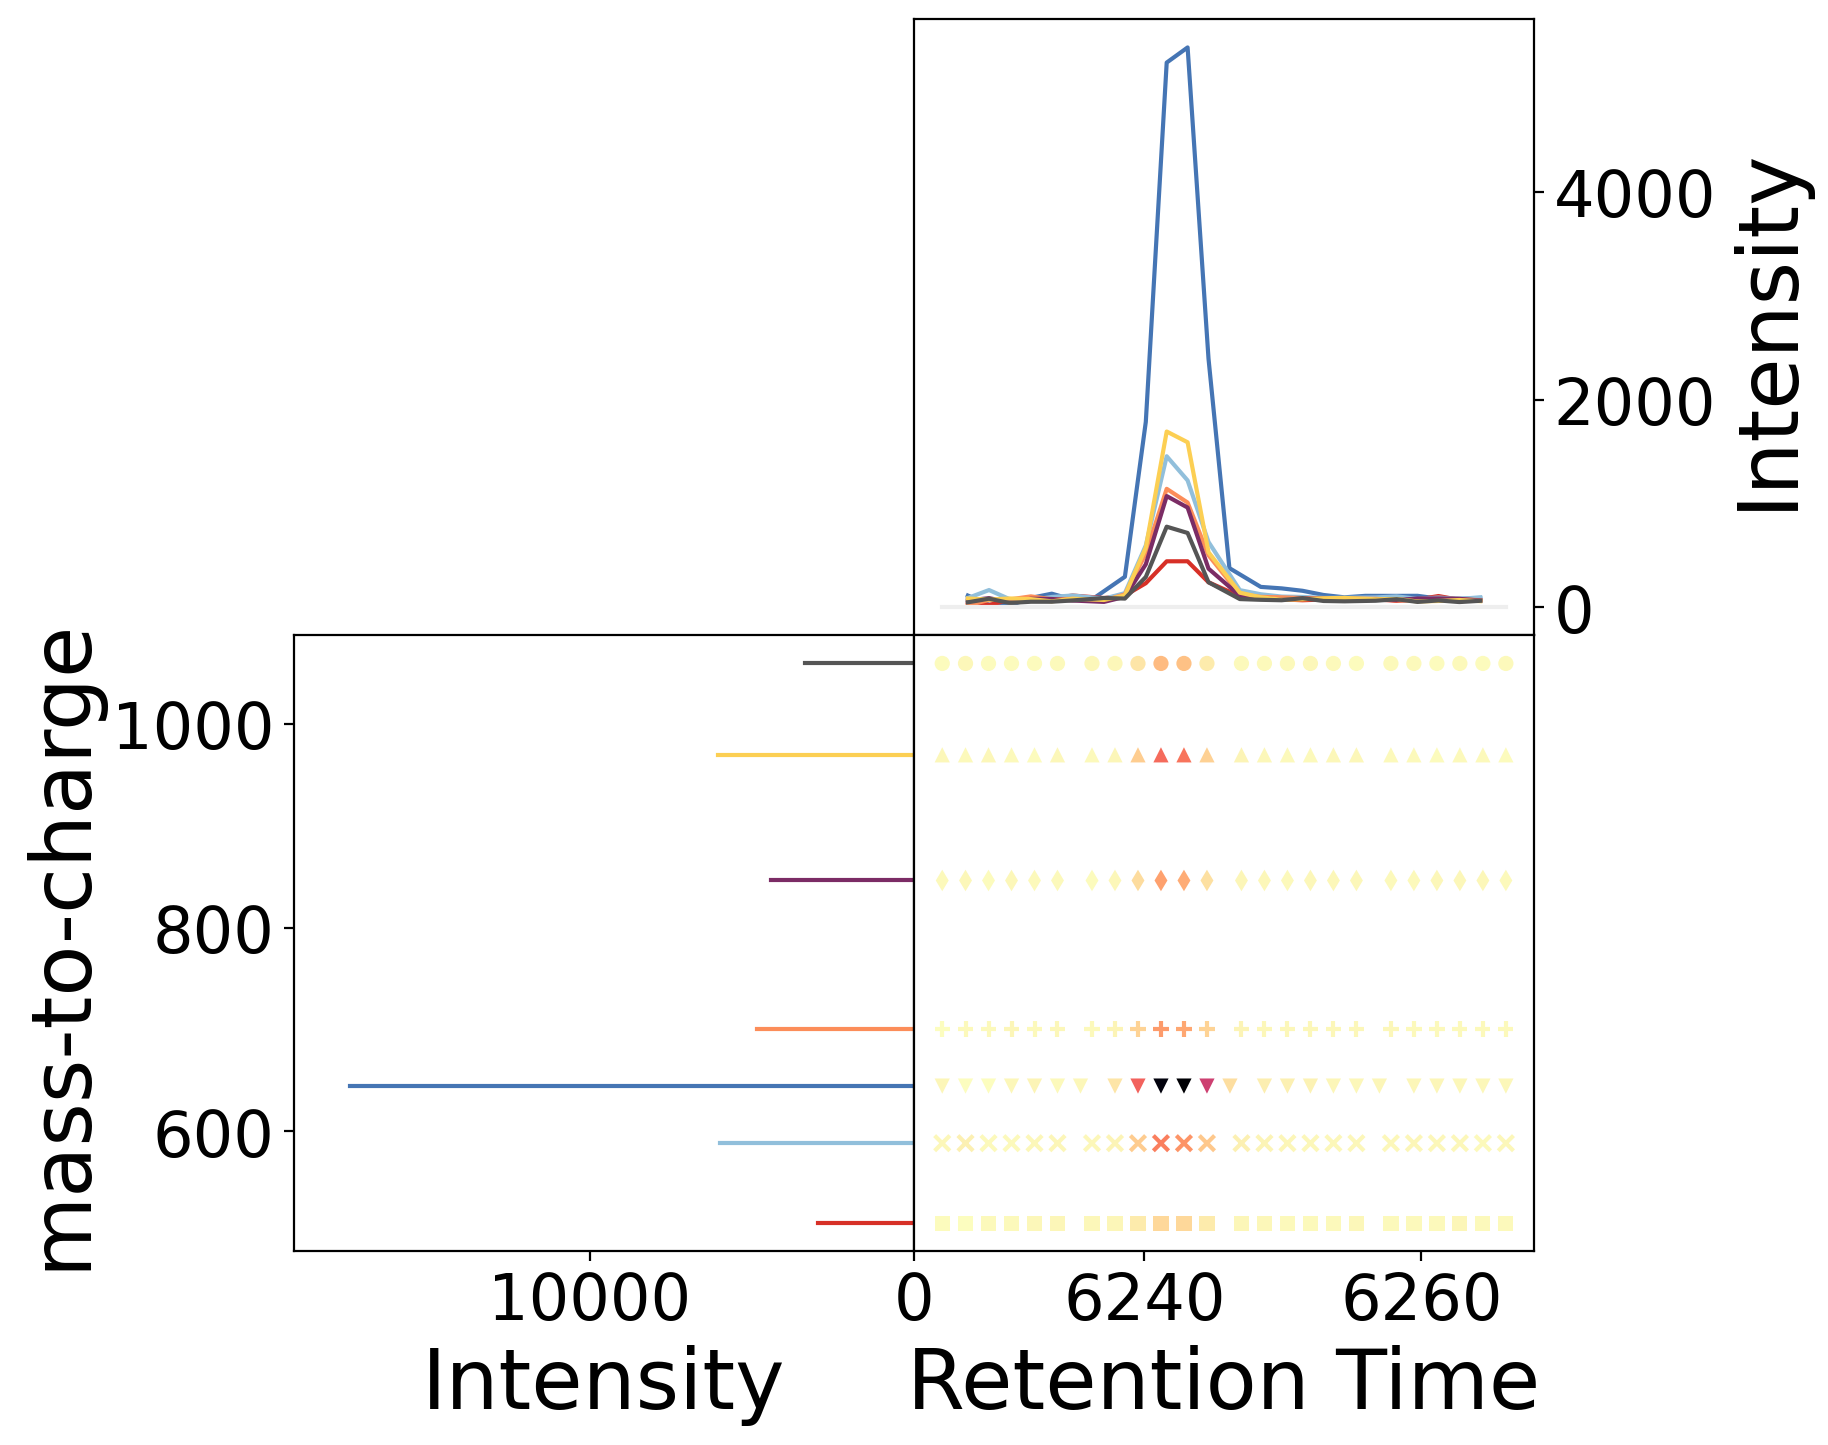

In [10]:
p = df.plot(kind="peakmap", 
        x="rt", y="mz", z="int", 
        by="ion_annotation",
        y_kind = "spectrum",
        # ylabel="ion_mobility",
        add_marginals=True,
        width=800, height=800,
        grid=False, line_width=5,
        title_font_size = title_font_size,
        xaxis_label_font_size = xaxis_label_font_size,
        yaxis_label_font_size = yaxis_label_font_size,
        xaxis_tick_font_size = xaxis_tick_font_size-5,
        yaxis_tick_font_size = yaxis_tick_font_size-5,
       legend={'show':False},
        show_plot=False)
# if pd.options.plotting.backend == "ms_matplotlib":
#     plt.savefig(f"{save_dir}/peakmap_marginal_mz_rt_matplotlib.png", bbox_inches='tight')
#     plt.savefig(f"{save_dir}/figure_3_g_peakmap_marginal_mz_rt_matplotlib.pdf", bbox_inches='tight')

/home/singjc/Documents/github/pyopenms_viz/pyopenms_viz/_core.py:250: UserWarning: Duplicate data detected, data will not be aggregated which may lead to unexpected plots. To enable aggregation set `aggregate_duplicates=True`.
  warnings.warn(
/home/singjc/Documents/github/pyopenms_viz/pyopenms_viz/_matplotlib/core.py:476: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter = ax.scatter(
/home/singjc/Documents/github/pyopenms_viz/pyopenms_viz/_matplotlib/core.py:476: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter = ax.scatter(


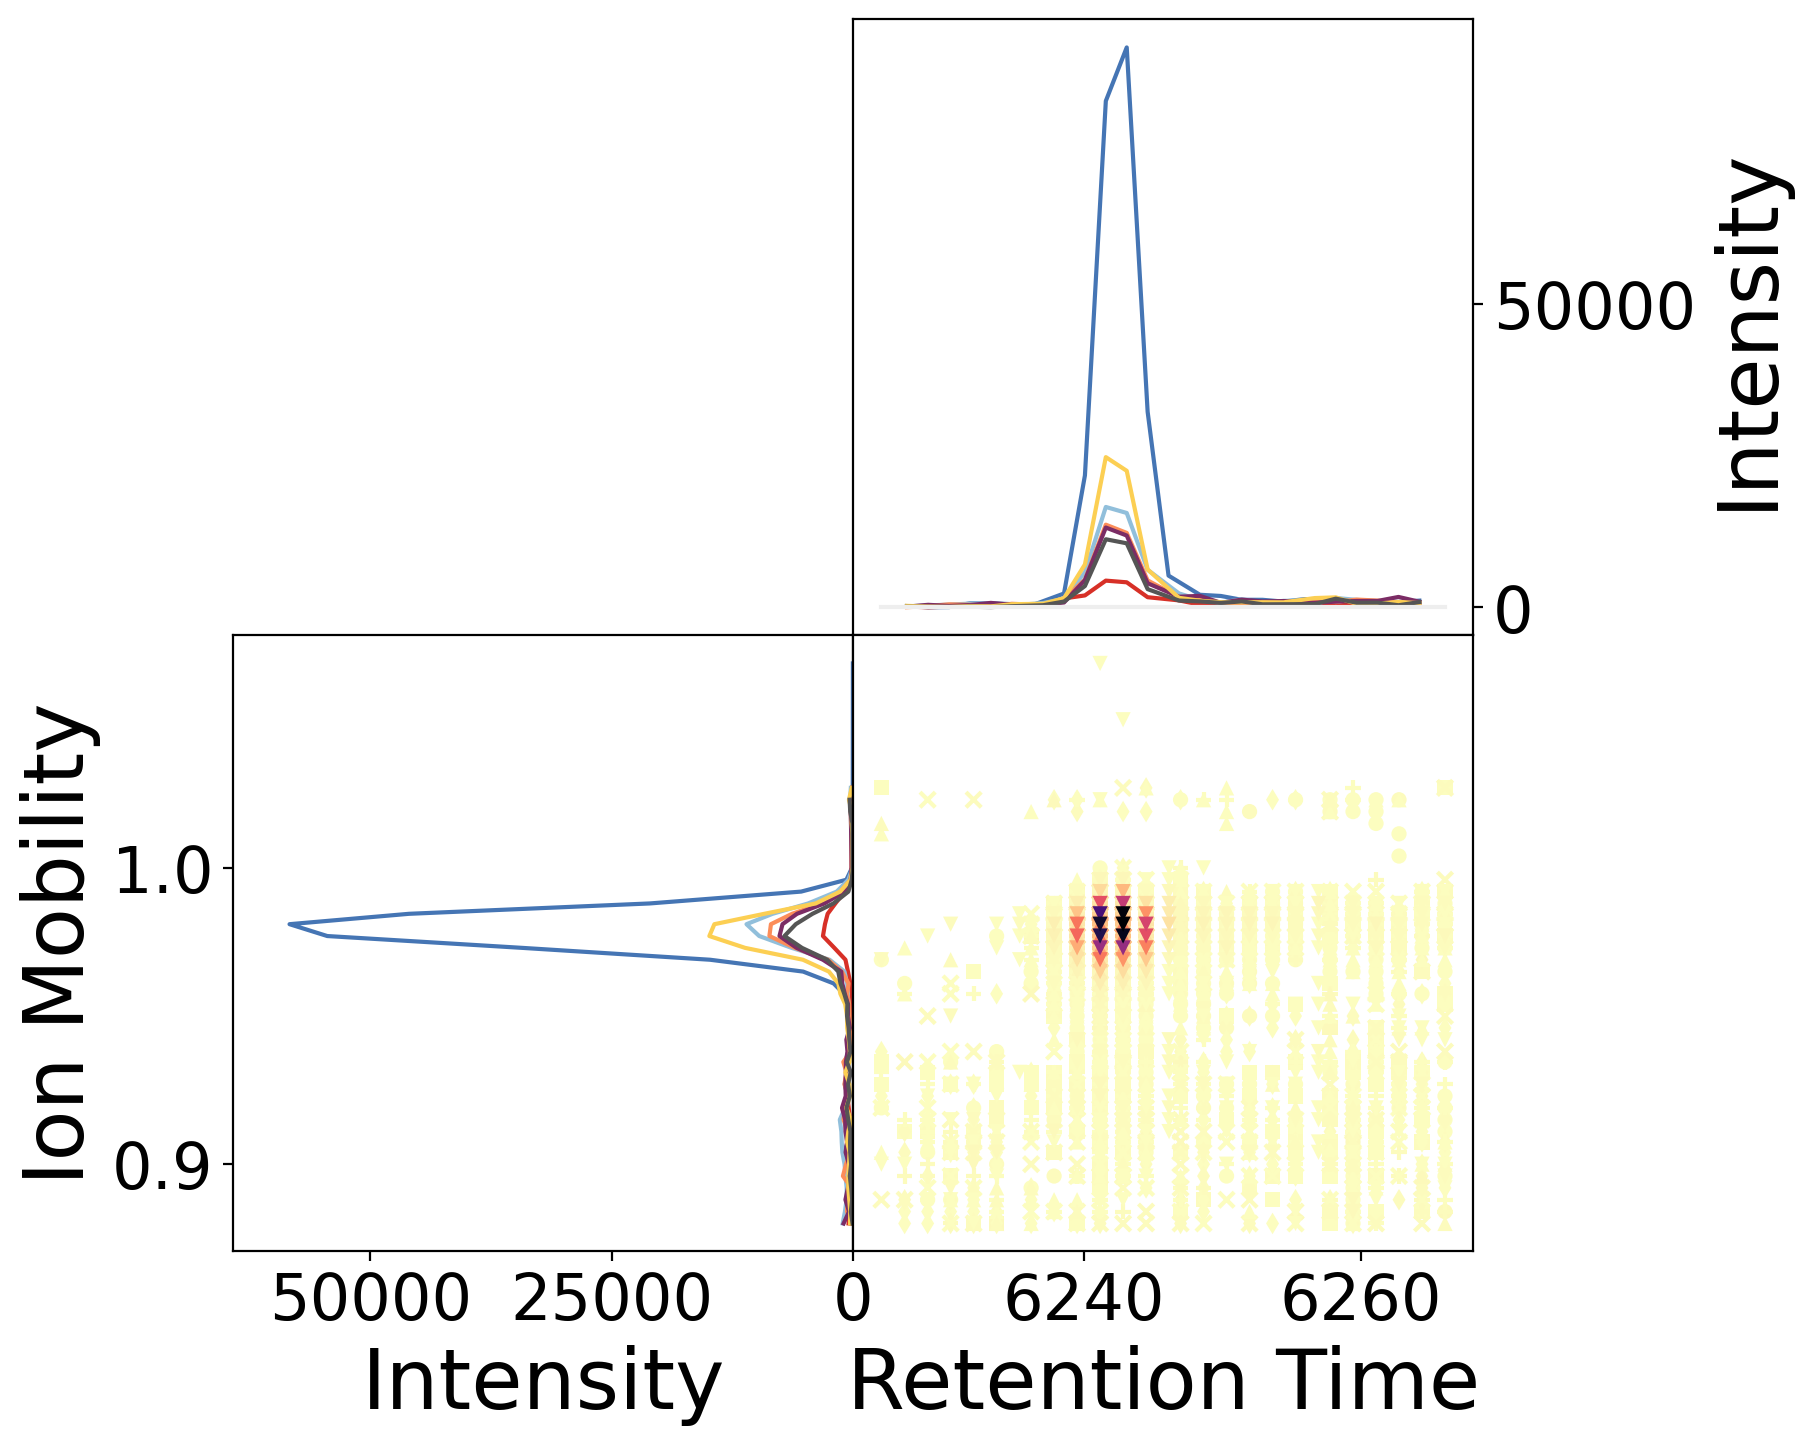

In [11]:
p = df.plot(kind="peakmap", 
        x="rt", y="im", z="int", 
        by="ion_annotation",
        y_kind = "chromatogram",
        ylabel="Ion Mobility",
        add_marginals=True,
        width=800, height=800,
        grid=False, line_width=5,
        title_font_size = title_font_size,
        xaxis_label_font_size = xaxis_label_font_size,
        yaxis_label_font_size = yaxis_label_font_size,
        xaxis_tick_font_size = xaxis_tick_font_size-5,
        yaxis_tick_font_size = yaxis_tick_font_size-5,
       legend={'show':False},
        show_plot=False)
# if pd.options.plotting.backend == "ms_matplotlib":
#     plt.savefig(f"{save_dir}/peakmap_marginal_im_rt_matplotlib.png", bbox_inches='tight')
#     plt.savefig(f"{save_dir}/figure_3_h_peakmap_marginal_im_rt_matplotlib.pdf", bbox_inches='tight')

/home/singjc/Documents/github/pyopenms_viz/pyopenms_viz/_core.py:250: UserWarning: Duplicate data detected, data will not be aggregated which may lead to unexpected plots. To enable aggregation set `aggregate_duplicates=True`.
  warnings.warn(
/home/singjc/Documents/github/pyopenms_viz/pyopenms_viz/_matplotlib/core.py:476: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter = ax.scatter(
/home/singjc/Documents/github/pyopenms_viz/pyopenms_viz/_matplotlib/core.py:476: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter = ax.scatter(


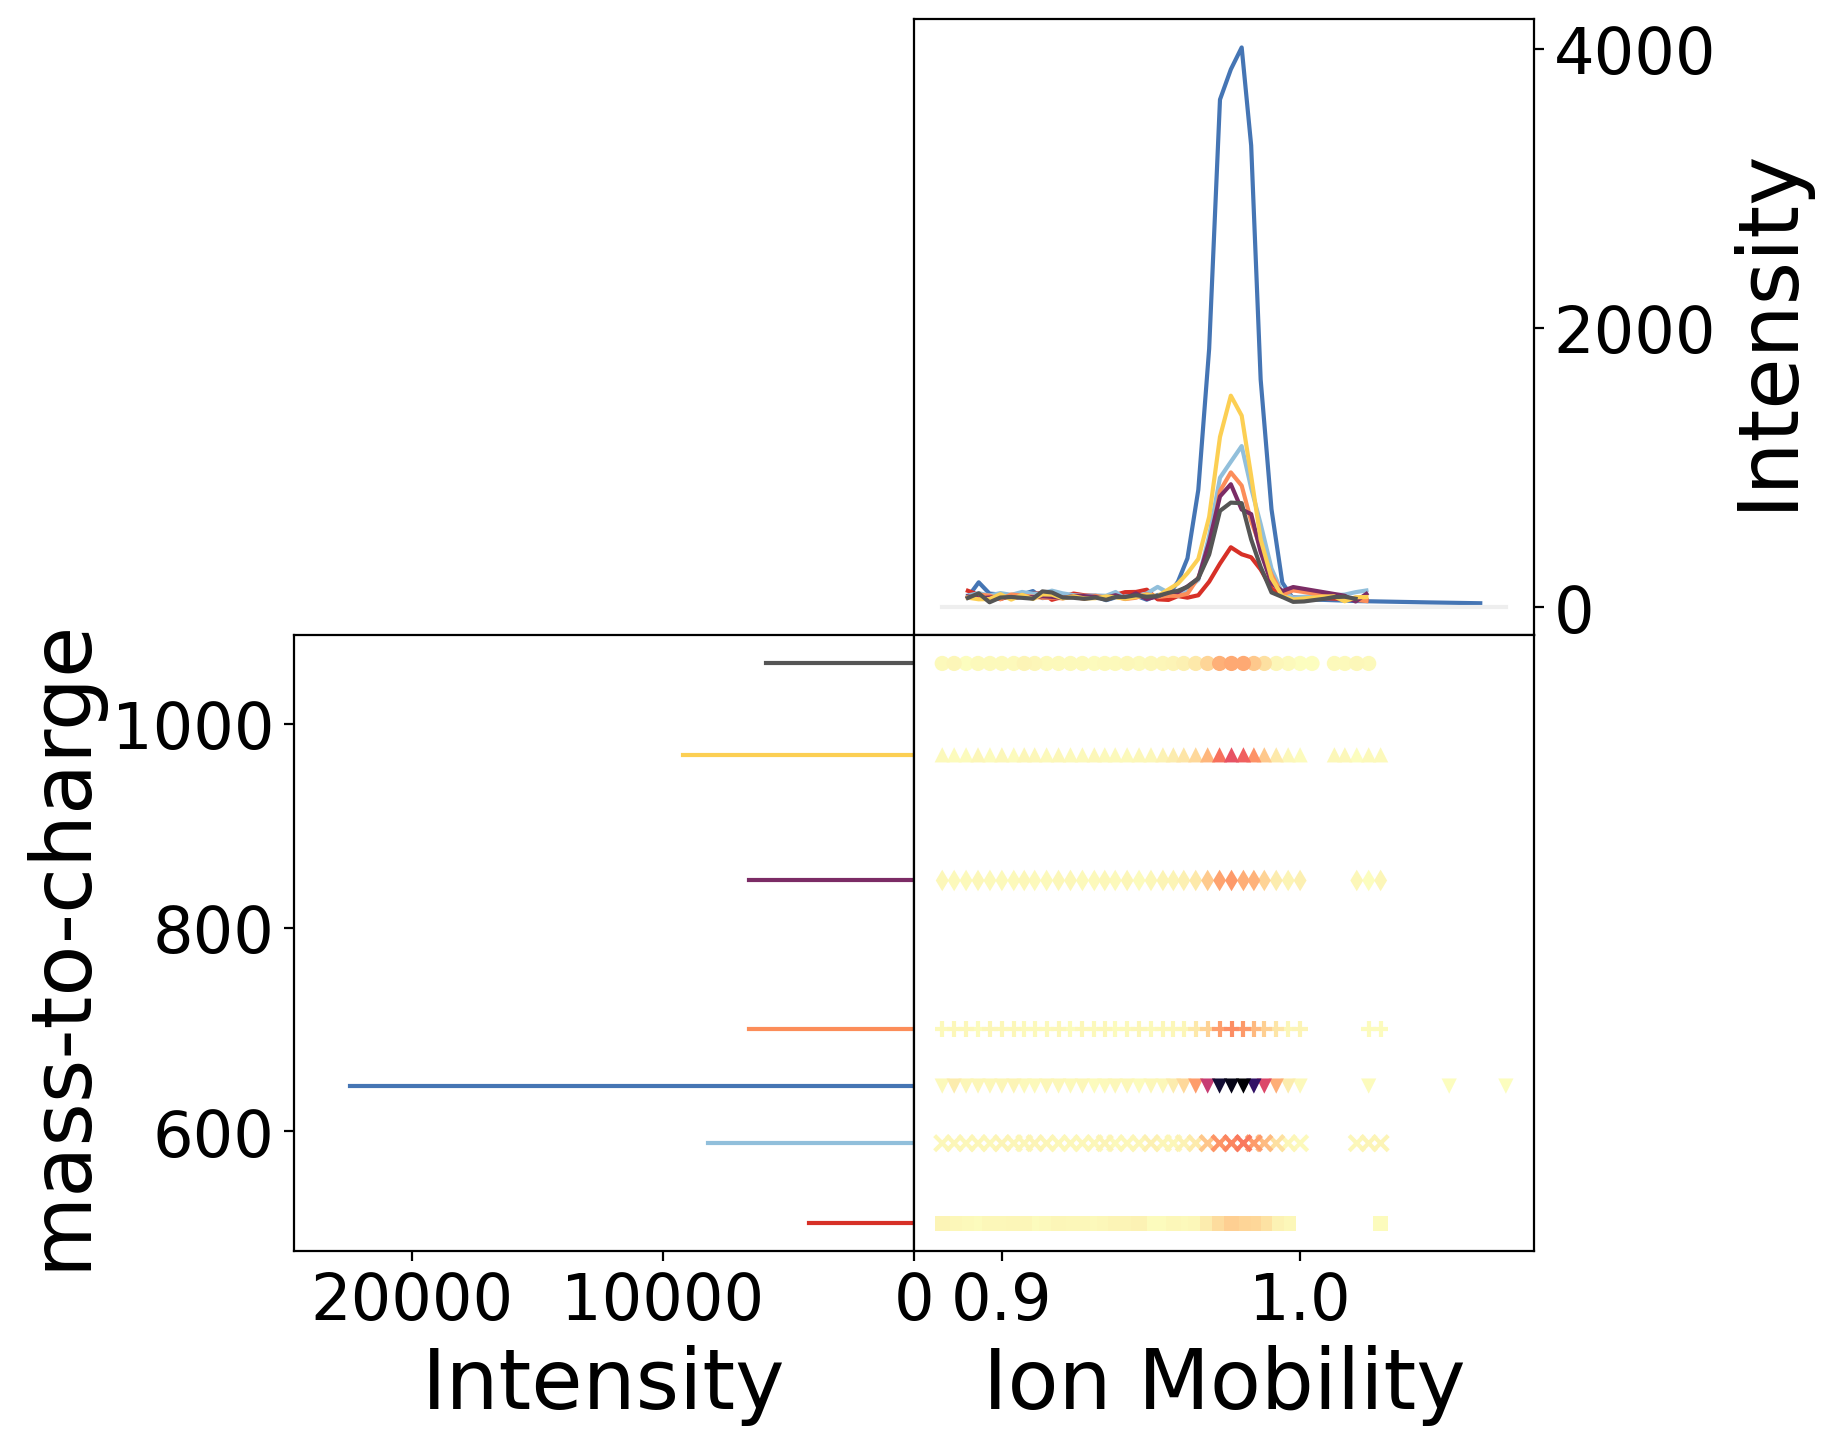

In [12]:
p = df.plot(kind="peakmap", 
        x="im", y="mz", z="int", 
        by="ion_annotation",
        # y_kind = "chromatogram",
        ylabel="mass-to-charge",
        xlabel="Ion Mobility",
        add_marginals=True,
        width=800, height=800,
        grid=False, line_width=5,
        title_font_size = title_font_size,
        xaxis_label_font_size = xaxis_label_font_size,
        yaxis_label_font_size = yaxis_label_font_size,
        xaxis_tick_font_size = xaxis_tick_font_size-5,
        yaxis_tick_font_size = yaxis_tick_font_size-5,
       legend={'show':False},
        show_plot=False)
# if pd.options.plotting.backend == "ms_matplotlib":
#     plt.savefig(f"{save_dir}/peakmap_marginal_im_mz_matplotlib.png", bbox_inches='tight')
#     plt.savefig(f"{save_dir}/figure_3_i_peakmap_marginal_im_mz_matplotlib.pdf", bbox_inches='tight')

/home/singjc/Documents/github/pyopenms_viz/pyopenms_viz/_core.py:250: UserWarning: Duplicate data detected, data will not be aggregated which may lead to unexpected plots. To enable aggregation set `aggregate_duplicates=True`.
  warnings.warn(


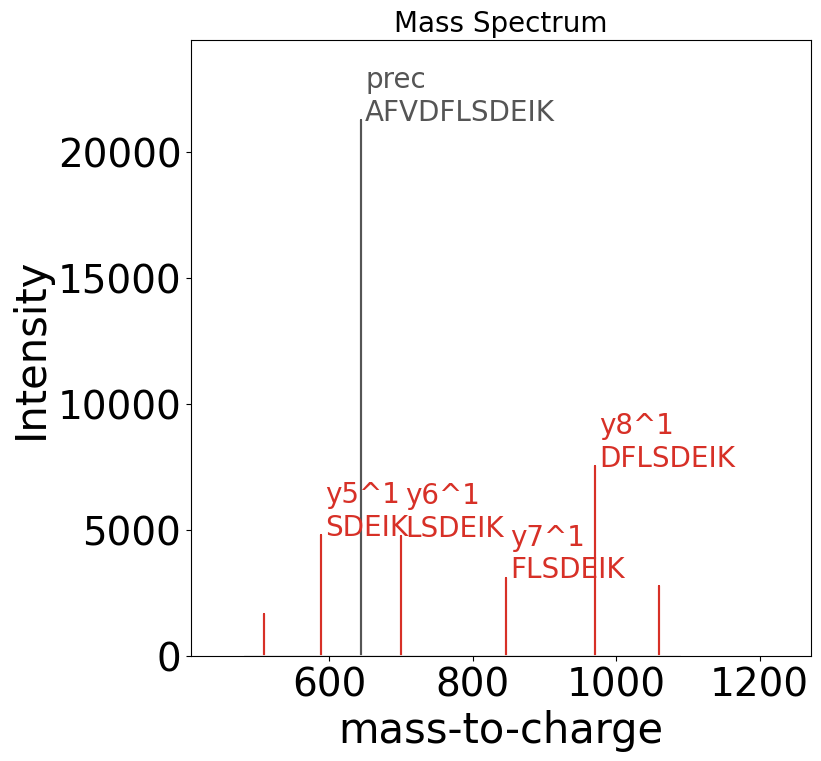

In [13]:
p = df.plot(kind="spectrum", x="mz", y="int", 
        ion_annotation="ion_annotation", 
        sequence_annotation="sequence", 
        annotate_mz=False, grid=False, 
        bin_peaks=True,
        width=800, height=800, 
        annotate_top_n_peaks=5,
        title_font_size = title_font_size,
        xaxis_label_font_size = xaxis_label_font_size,
        yaxis_label_font_size = yaxis_label_font_size,
        xaxis_tick_font_size = xaxis_tick_font_size,
        yaxis_tick_font_size = yaxis_tick_font_size,
        annotation_font_size = annotation_font_size+0,
        show_plot=False
        )
# plt.savefig(f"{save_dir}/spectrum_matplotlib.png",bbox_inches='tight')
# plt.savefig(f"{save_dir}/figure_3_a_spectrum_matplotlib.pdf", bbox_inches='tight')

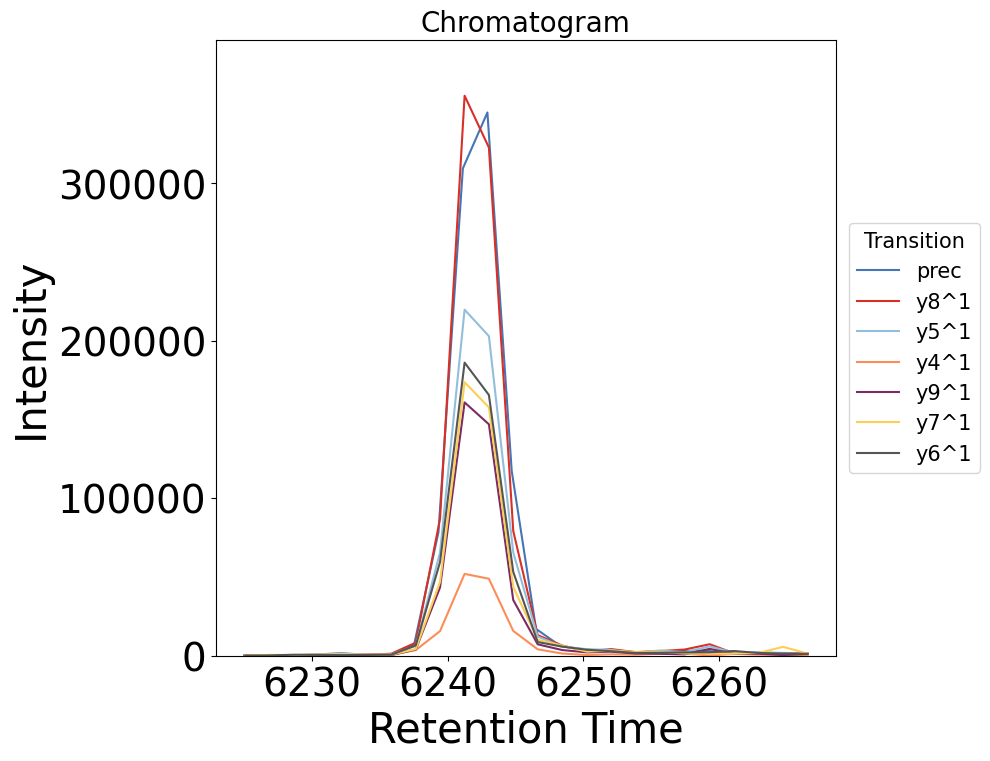

In [14]:
group_cols=['ms_level', 'ion_annotation', 'rt']
p = df.apply(lambda x: x.fillna(0) \
          if x.dtype.kind in "biufc" \
          else x.fillna(".")) \
.groupby(group_cols)['int'].sum().reset_index() \
.plot(kind="chromatogram", x="rt", y="int", 
      by="ion_annotation", grid=False, width=800, height=800,
     title_font_size = title_font_size,
        xaxis_label_font_size = xaxis_label_font_size,
        yaxis_label_font_size = yaxis_label_font_size,
        xaxis_tick_font_size = xaxis_tick_font_size,
        yaxis_tick_font_size = yaxis_tick_font_size,
     legend={'title':'Transition','fontsize':15, 'bbox_to_anchor':(1.25, 0.5) },
        show_plot=False)
# plt.savefig(f"{save_dir}/chromatogram_matplotlib.png", 
#                    bbox_inches='tight')
# plt.savefig(f"{save_dir}/figure_3_b_chromatogram_matplotlib.pdf", bbox_inches='tight')

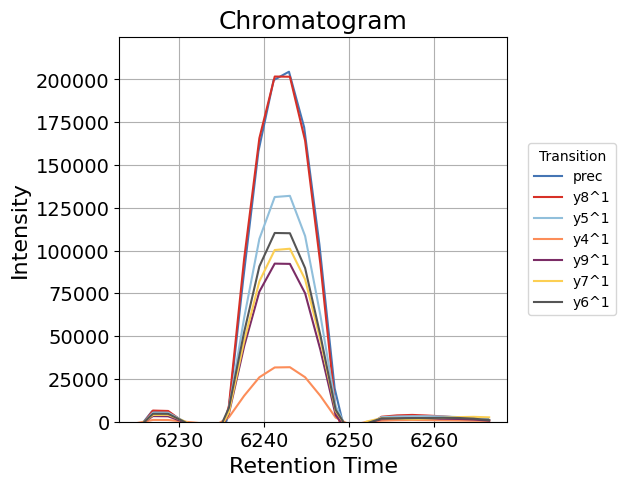

In [15]:
def apply_sgolay(group, along_col='rt', window_length=11, polyorder=4):
    # Sort the group by 'rt' to ensure correct order for smoothing
    group = group.sort_values(along_col)
    
    # Apply Savitzky-Golay filter
    group['smoothed_int'] = savgol_filter(group['int'], window_length=window_length, polyorder=polyorder)
    
    return group
    
group_cols=['ms_level', 'ion_annotation', 'rt']
integrate_col = 'int'
df.apply(
        lambda x: x.fillna(0) if x.dtype.kind in "biufc" else x.fillna(".")
    ) \
    .groupby(group_cols)[integrate_col] \
    .sum() \
    .reset_index() \
    .groupby(['ion_annotation', 'ms_level'])[group_cols + [integrate_col]] \
    .apply(apply_sgolay, 
           window_length=9,
           polyorder=3) \
    .reset_index(drop=True) \
    .plot(kind="chromatogram", x="rt", y="smoothed_int", 
                      by="ion_annotation", 
                      legend={'title':"Transition", 'bbox_to_anchor':(1.3, 0.5)})

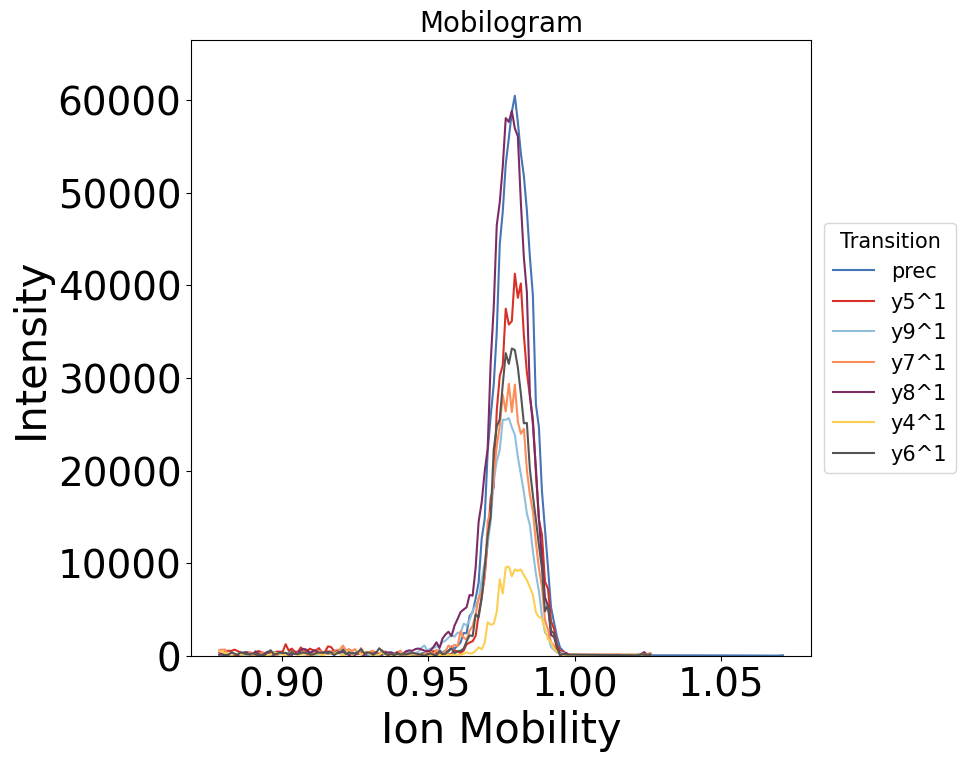

In [16]:
group_cols=['ms_level', 'ion_annotation', 'im']
integrate_col = 'int'
p = df.apply(
        lambda x: x.fillna(0) \
                  if x.dtype.kind in "biufc" \
                  else x.fillna(".")) \
    .groupby(group_cols)[integrate_col] \
    .sum().reset_index() \
    .plot(kind="mobilogram", 
          x="im", y="int", 
          by="ion_annotation",
          grid=False, width=800, height=800,
          title_font_size = title_font_size,
        xaxis_label_font_size = xaxis_label_font_size,
        yaxis_label_font_size = yaxis_label_font_size,
        xaxis_tick_font_size = xaxis_tick_font_size,
        yaxis_tick_font_size = yaxis_tick_font_size,
     legend={'title':'Transition', 'fontsize':15, 'bbox_to_anchor':(1.25, 0.5) },
        show_plot=False)
# plt.savefig(f"{save_dir}/mobilogram_matplotlib.png", bbox_inches='tight')
# plt.savefig(f"{save_dir}/figure_3_c_mobilogram_matplotlib.pdf", bbox_inches='tight')

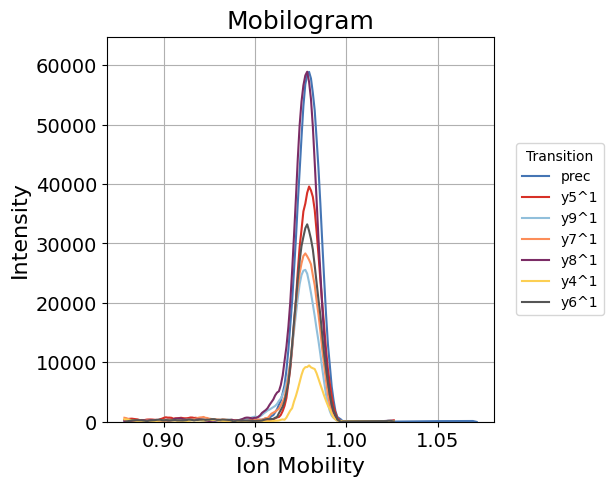

In [17]:
group_cols=['ms_level', 'ion_annotation', 'im']
integrate_col = 'int'
df.apply(
        lambda x: x.fillna(0) if x.dtype.kind in "biufc" else x.fillna(".")
    ) \
    .groupby(group_cols)[integrate_col] \
    .sum() \
    .reset_index() \
    .groupby(['ion_annotation', 'ms_level'])[group_cols + [integrate_col]] \
    .apply(apply_sgolay, 
           along_col='im', 
           window_length=9,
           polyorder=3) \
    .reset_index(drop=True) \
    .plot(kind="mobilogram", x="im", y="smoothed_int", 
                      by="ion_annotation", 
                      legend={'title':"Transition", 'bbox_to_anchor':(1.3, 0.5)})